In [118]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  # for plotting

#import the data from the csv file
data = pd.read_csv('../data/train.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [119]:
# Check the column names and types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There seems to be 12 columns, with PassengerID as the index and the Survived column as the Target variable.

We see many NA values under the "Age" and "Cabin" column, also a few NA values in Embarked column.
We need to investigate this further to decide if we should either impute or take them out.

In [121]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Comments about the values of each column
- PassengerId -> Ignore. just the index
- Survived -> seem to be only 2 values (dtype = int), where min is 0 and max is 1. 
- Pclass -> min = 1 and max = 3 is aligned with our understanding of the data with dtype = int
- Age -> min 0.42 and max of 80 makes sense
- SibSp -> min 0 and max 8, dtype = int; No issue
- Parch -> min 0 and max 6, dtype = int; No issue
- Fare -> min  0 and max = 512, dtype = Float; fare = 0 might make sense since it's free, but maybe we should check whether or not this value is valid.

In [122]:
# Check for any NA values in the data
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Checking the Age column

In [123]:
# look at the statistics under the Age column
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

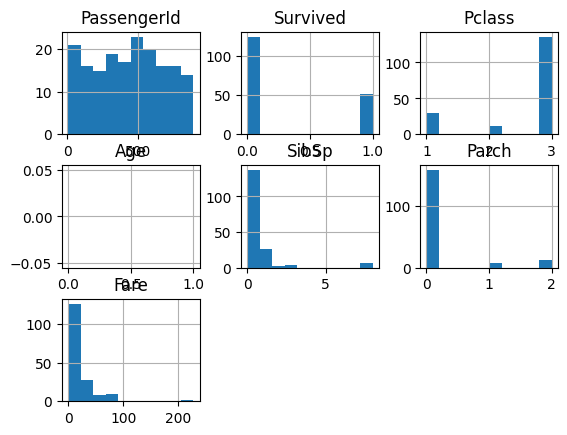

In [ ]:
# Check the distribution of data with na values under Age
data[data['Age'].isna()].hist()
plt.title("Distribution of Variables with Null")
plt.tight_layout()
plt.show()

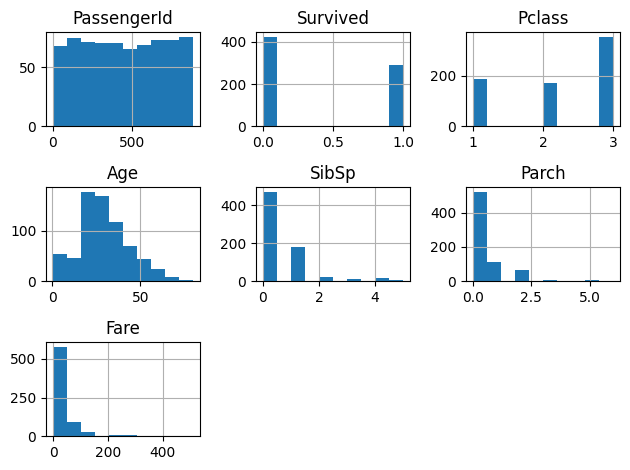

In [46]:
# Check the distribution of data without na values under Age
data[data['Age'].notna()].hist()
plt.tight_layout()
plt.show()

Since there is not much different between the distribution of other elements from passengers with and without null Age values, we will try to fill in the Null values with either the mean or the median value.

# TO DO: FILL IN NA VALUES IN AGE COLUMN WITH EITHER THE MEAN OR MEDIAN VALUE

In [128]:
# Fill in the missing values under Age column with the mean of the column as integers
data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(int)

## Checking the Cabin Column Values

In [129]:
# Count the number of values under the Cabin column
data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

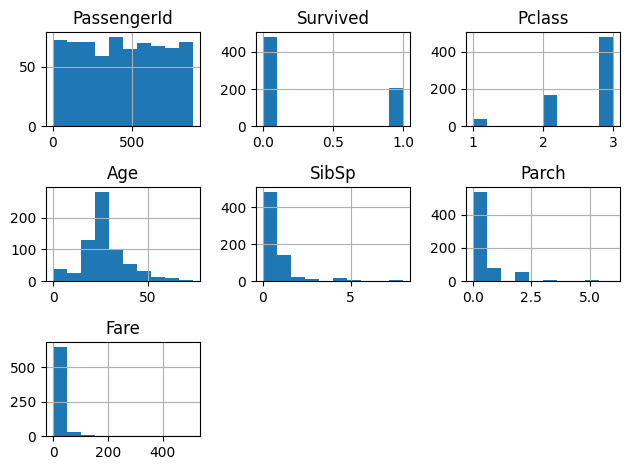

In [130]:
# Look at the distribution of data when the Cabin column is null
data[data['Cabin'].isna()].hist()
plt.tight_layout()
plt.show()

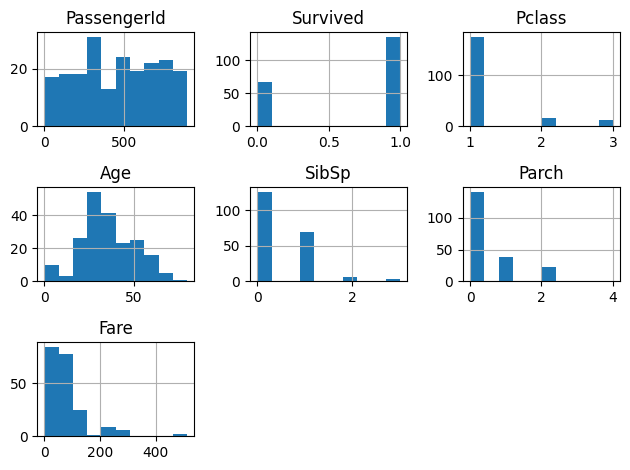

In [131]:
# Check the distribution of data without na values under Age
data[data['Cabin'].notna()].hist()
plt.tight_layout()
plt.show()

Interestingly, it seems that those with a Cabin value is from the 1 Pclass and has higher proportion of surviving compared to those without a cabin value. We could potentially encode this Cabin value as either "With" or "Without" to indicate that someone was assigned a "Cabin" value.

# TO DO: ENCODE CABIN COLUMN INTO EITHER A COLUMN THAT INDICATES THE EXISTENCE OR NON-EXISTENCE OF CABIN.

In [132]:
# drop the cabin and cabin_initial columns
has_cabin = np.ones((len(data),1))
has_cabin[data["Cabin"].isnull()] = 0


In [133]:
data["has_cabin"] = has_cabin

In [134]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0.0


In [135]:
data = data.drop("Cabin", axis = 1)

In [136]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'has_cabin'],
      dtype='object')

## Embarked column

In [137]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,1.0


Interestingly, the cabin value for both this person is the same. Most likely we can drop them both.

# TO DO: TAKE OUT THE 2 ROWS WITH NA VALUES UNDER THE EMBARKED COLUMN

In [172]:
data = data.dropna(subset="Embarked", axis = 0)

# Check the Ticket Column

In [173]:
data["Ticket"].value_counts()

KeyError: 'Ticket'

There does not seem to be any relevance from the Ticket column, so we can take it out.

# TO DO: TAKE OUT THE TICKET COLUMN AS IT IS NOT RELEVANT

In [174]:
data = data.drop(labels = "Ticket", axis=1)

KeyError: "['Ticket'] not found in axis"

# TO DO: TAKE OUT THE NAME COLUMN TOO AS IT IS NOT RELEVANT

In [175]:
data = data.drop(labels = "Name", axis=1)

KeyError: "['Name'] not found in axis"

# Final check of the modified table

In [177]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
886,887,0,2,male,27,0,0,13.00,S,0.0
887,888,1,1,female,19,0,0,30.00,S,1.0
888,889,0,3,female,29,1,2,23.45,S,0.0
889,890,1,1,male,26,0,0,30.00,C,1.0
890,891,0,3,male,32,0,0,7.75,Q,0.0


In [178]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'has_cabin'],
      dtype='object')

In [179]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
has_cabin      0
dtype: int64

# In addition, we should also take out the passenger ID and Survived column as the ID should not matter and the "Survived" column is used as the target variable.

In [202]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'has_cabin'],
      dtype='object')

In [203]:
X_train = data[['Pclass', 'Sex', 'Age', 'SibSp',
                'Parch', 'Fare', 'Embarked', 'has_cabin']]
y_train = data["Survived"]

In [204]:
X_train.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
886,2,male,27,0,0,13.00,S,0.0
887,1,female,19,0,0,30.00,S,1.0
888,3,female,29,1,2,23.45,S,0.0
889,1,male,26,0,0,30.00,C,1.0
890,3,male,32,0,0,7.75,Q,0.0


In [205]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Encoding Categorical Values

The following columns should be categorized
- Sex (1 column)
- Pclass (2 columns)
- Embarked (2 columns)

In [206]:
X_train["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [207]:
X_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [208]:
X_train["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

# Note that the categorical values should not be standardized

In [209]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train[["Sex", "Pclass", "Embarked"]].copy()

cat_encoder = OneHotEncoder(drop="first", sparse_output=False)
X_train_cat_hot = cat_encoder.fit_transform(X_train_cat)

In [210]:
cat_encoder.get_feature_names_out()

array(['Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [211]:
cat_encoder.n_features_in_

3

In [212]:
X_train_cat_hot_df = pd.DataFrame(X_train_cat_hot,
                               columns=cat_encoder.get_feature_names_out(),
                               index=X_train_cat.index)

In [213]:
X_train_cat_hot_df.head()

,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0


In [214]:
X_train = pd.concat([X_train,X_train_cat_hot_df], axis=1)

In [215]:
X_train.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
886,2,male,27,0,0,13.00,S,0.0,1.0,1.0,0.0,0.0,1.0
887,1,female,19,0,0,30.00,S,1.0,0.0,0.0,0.0,0.0,1.0
888,3,female,29,1,2,23.45,S,0.0,0.0,0.0,1.0,0.0,1.0
889,1,male,26,0,0,30.00,C,1.0,1.0,0.0,0.0,0.0,0.0
890,3,male,32,0,0,7.75,Q,0.0,1.0,0.0,1.0,1.0,0.0


In [99]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'has_cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [216]:
# Drop the following encoded columns
# ['Pclass', 'Sex', 'Embarked']
X_train_clean = X_train.drop(labels=['Pclass', 'Sex', 'Embarked'], axis=1)

In [217]:
X_train_clean.tail()

,Age,SibSp,Parch,Fare,has_cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
886,27,0,0,13.00,0.0,1.0,1.0,0.0,0.0,1.0
887,19,0,0,30.00,1.0,0.0,0.0,0.0,0.0,1.0
888,29,1,2,23.45,0.0,0.0,0.0,1.0,0.0,1.0
889,26,0,0,30.00,1.0,1.0,0.0,0.0,0.0,0.0
890,32,0,0,7.75,0.0,1.0,0.0,1.0,1.0,0.0


In [226]:
X_train_clean[["Age", "SibSp", "Parch", "Fare"]] = X_train_clean[["Age", "SibSp", "Parch", "Fare"]].astype(float)

In [227]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         889 non-null    float64
 1   SibSp       889 non-null    float64
 2   Parch       889 non-null    float64
 3   Fare        889 non-null    float64
 4   has_cabin   889 non-null    float64
 5   Sex_male    889 non-null    float64
 6   Pclass_2    889 non-null    float64
 7   Pclass_3    889 non-null    float64
 8   Embarked_Q  889 non-null    float64
 9   Embarked_S  889 non-null    float64
dtypes: float64(10)
memory usage: 108.7 KB


In [228]:
def loglikel_bernoulli(y, x, beta):
    loglikel = 0
    for i_ in range(len(y)):
        yi = y.iloc[i_]
        xi = x.iloc[i_, :]
        u = np.sum(xi * beta)
        log_p = u - np.log(1 + np.exp(u))
        log_1_minus_p = - np.log(1 + np.exp(u))
        loglikel = loglikel + yi * log_p + (1 - yi) * log_1_minus_p
    return loglikel

In [229]:
columns_to_normalize = [
    "Age", "SibSp", "Parch", "Fare"
]

In [243]:
from sklearn.linear_model import LogisticRegression  # logistic regression with optionally built in regularization.
from sklearn.linear_model import LogisticRegressionCV  # logistic regression with built in regularization. The penalty parameter is Cross-validated
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score # computes the AUC score
import matplotlib.pyplot as plt # for plotting
import time # for timekeeping

"""
Use the methods like this, which should look similar to what we did last week:

    clf = LogisticRegression(penalty=None, max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  # the .fit method operates on the clf object in-place
    Y_pred = clf.predict_proba(X_test)  # this gives us the probabilities of each label
    print(clf.classes_)  # look at this to see the order of the labels in Y_pred
    Y_pred_P1 = Y_pred[:, 1]  # so this is the probability of assigning Y=1
    
For L1 regularization, the following settings performed well for me:

    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000)  # uses 5-fold cross validation by default
    
And finally for L2 regularization, the following settings performed well for me:

    clf = LogisticRegressionCV(penalty='l2', max_iter=10000)  # uses 5-fold cross validation by default

You use roc_auc_score like this (definitely google the documentation for all of these methods):

    auc = roc_auc_score(Y_test, Y_pred_P1)
    
where Y_test is a vector of the true 0-1 labels and Y_pred_P1 is a corresponding vector of PROBABILITIES for Y=1.
See the example code I wrote above to see how to predict the probabilities P(Y=1).

"""
# The following grid will be used to cross-validate over the GBT parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
}

n_splits = 20  # like last week, we will do 20 cross validation splits

indices = list(range(X_train_clean.shape[0]))
n_train = int(len(indices) * .85)  # 85% train, 15% split

importances_rf = []  # solutions: container for RF feature importances
importances_gbt = []  # solutions: container for RF feature importances

# container for the accuracy scores
acc_scores = {}  # this time we will use a dictionary structure to contain the performance metrics
for model_name in ['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', "xgb"]:
    acc_scores[model_name] = []  # initialize this dictionary entry to an empty list

# container for the AUC scores
auc_scores = {}  # this time we will use a dictionary structure to contain the performance metrics
for model_name in ['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', "xgb"]:
    auc_scores[model_name] = []  # initialize this dictionary entry to an empty list

# container for the loglikelihood scores
ll_scores = {}  # this time we will use a dictionary structure to contain the performance metrics
for model_name in ['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', "xgb"]:
    ll_scores[model_name] = []  # initialize this dictionary entry to an empty list

# container for the coefficients
coefs = {}
for model_name in ['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', "xgb"]:
    coefs[model_name] = []  # initialize this dictionary entry to an empty list
    
# Like last week, I'll just do random sampling of test sets (instead of K-fold cross validation)
for i_ in range(n_splits):
    
    t_start = time.time()  # used to time things
    
    np.random.shuffle(indices)  # shuffles the list in-place, so returns nothing
    train_inds = indices[:n_train]  # the first 85% are training indices
    test_inds = indices[n_train:]  # the remaining 15% are testing indices
    
    X_train = X_train_clean.iloc[train_inds, :].copy()  # remember .iloc is used for integer indexing!
    X_test = X_train_clean.iloc[test_inds, :].copy()
    
    Y_train = y_train.iloc[train_inds]
    Y_test = y_train.iloc[test_inds]
    
    # standardize the predictors, for the columns that are needed to normalized before
    # not here the indexing of column is done with key
    for key in columns_to_normalize:
        x_mean = X_train[key].mean()
        x_std = X_train[key].std()
        X_train.loc[:, key] = (X_train[key].astype(float) - x_mean) / x_std  # vectorized
        X_test.loc[:, key] = (X_test[key].astype(float) - x_mean) / x_std  # use the training statistics to transform the test cases

    # FIT LOGISTIC REGRESSION MODEL
    clf = LogisticRegression(penalty=None, max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  # the .fit method operates on the clf object in-place

    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['logreg'].append(acc)

    # compute the predicted probability on test set
    Y_pred = clf.predict_proba(X_test)  # this gives us the probabilities of each label
    # print(clf.classes_)  # look at this to see the order of the labels in Y_pred
    Y_pred_P1 = Y_pred[:, 1]  # P(Y=1)
    # compute AUC score (look at the docs to see how to use this function)
    auc = roc_auc_score(Y_test, Y_pred_P1)  
    auc_scores['logreg'].append(auc)
    # compute loglikelihood scores
    ll = loglikel_bernoulli(Y_test, X_test, clf.coef_[0, :])
    ll_scores['logreg'].append(ll)
    # extract coefficient estimates
    coefs['logreg'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    # this may take some time to run so print out some progress to let us know things are advancing
    print("Finished logreg split:", i_)

    # FIT LOGISTICS REGRESSION WITH L1 PENALTHY, cross-validated
    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  
    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['logreg_l1'].append(acc)

    Y_pred = clf.predict_proba(X_test)  
    Y_pred_P1 = Y_pred[:, 1]
    auc = roc_auc_score(Y_test, Y_pred_P1)
    auc_scores['logreg_l1'].append(auc)
    ll = loglikel_bernoulli(Y_test, X_test, clf.coef_[0, :])
    ll_scores['logreg_l1'].append(ll)
    coefs['logreg_l1'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    print("Finished logreg l1 split:", i_)

    # FIT LOGISTICS REGRESSION WITH L2 PENALTHY, cross-validated
    clf = LogisticRegressionCV(penalty='l2', max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)      
    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['logreg_l2'].append(acc)

    Y_pred = clf.predict_proba(X_test) 
    Y_pred_P1 = Y_pred[:, 1] 
    auc = roc_auc_score(Y_test, Y_pred_P1)
    auc_scores['logreg_l2'].append(auc)
    ll = loglikel_bernoulli(Y_test, X_test, clf.coef_[0, :])
    ll_scores['logreg_l2'].append(ll)
    coefs['logreg_l2'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    print("Finished logreg l2 split:", i_)

    # FIT DECISION TREE
    dt = DecisionTreeClassifier().fit(X_train, Y_train)
    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = dt.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['dt'].append(acc)

    Y_pred = dt.predict_proba(X_test)
    Y_pred_P1 = Y_pred[:, 1] 
    auc = roc_auc_score(Y_test, Y_pred_P1)
    auc_scores['dt'].append(auc)
    # ll = loglikel_bernoulli(Y_test, X_test, dt.coef_[0, :])
    # ll_scores['dt'].append(ll)
    # coefs['dt'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    print("Finished dt split:", i_)

    # FIT RANDOM FOREST
    rf = RandomForestClassifier(n_estimators=200).fit(X_train, Y_train)
    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = rf.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['rf'].append(acc)

    Y_pred = rf.predict_proba(X_test)
    Y_pred_P1 = Y_pred[:, 1] 
    auc = roc_auc_score(Y_test, Y_pred_P1)
    auc_scores['rf'].append(auc)
    # ll = loglikel_bernoulli(Y_test, X_test, rf.coef_[0, :])
    # ll_scores['rf'].append(ll)
    # coefs['rf'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    print("Finished rf split:", i_)

    # store the feature importances for Problem 3
    rf_s = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)  # solution
    importances_rf.append(rf_s)  # solution

    # FIT XGBOOST, you should cross-validate over the number of trees and learning rate
    grid = GridSearchCV(
        GradientBoostingClassifier(),
        param_grid,
        cv=5,
    )
    grid.fit(X_train, Y_train)
    gbt = grid.best_estimator_
    # compute Accuracy score (look at the docs to see how to use this function)
    Y_pred = gbt.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)  
    acc_scores['xgb'].append(acc)

    Y_pred = gbt.predict_proba(X_test)
    Y_pred_P1 = Y_pred[:, 1] 
    auc = roc_auc_score(Y_test, Y_pred_P1)
    auc_scores['xgb'].append(auc)
    # ll = loglikel_bernoulli(Y_test, X_test, gbt.coef_[0, :])
    # ll_scores['xgb'].append(ll)
    # coefs['xgb'].append(pd.Series(clf.coef_[0, :], index=clf.feature_names_in_))
    print("Finished xgb split:", i_)
    
    # store the feature importances for Problem 3
    gbt_s = pd.Series(gbt.feature_importances_, index=gbt.feature_names_in_)  # solution
    importances_gbt.append(gbt_s)  # solution
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)

Finished logreg split: 0
Finished logreg l1 split: 0
Finished logreg l2 split: 0
Finished dt split: 0
Finished rf split: 0
Finished xgb split: 0
This split took: 10.15 secs
Finished logreg split: 1
Finished logreg l1 split: 1
Finished logreg l2 split: 1
Finished dt split: 1
Finished rf split: 1
Finished xgb split: 1
This split took: 10.16 secs
Finished logreg split: 2
Finished logreg l1 split: 2
Finished logreg l2 split: 2
Finished dt split: 2
Finished rf split: 2
Finished xgb split: 2
This split took: 9.98 secs
Finished logreg split: 3
Finished logreg l1 split: 3
Finished logreg l2 split: 3
Finished dt split: 3
Finished rf split: 3
Finished xgb split: 3
This split took: 9.86 secs
Finished logreg split: 4
Finished logreg l1 split: 4
Finished logreg l2 split: 4
Finished dt split: 4
Finished rf split: 4
Finished xgb split: 4
This split took: 10.42 secs
Finished logreg split: 5
Finished logreg l1 split: 5
Finished logreg l2 split: 5
Finished dt split: 5
Finished rf split: 5
Finished xgb s

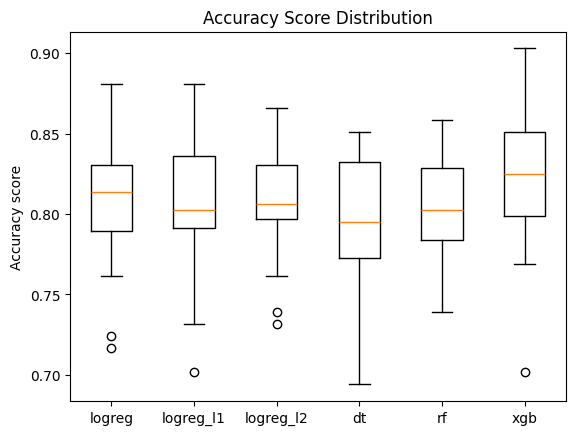

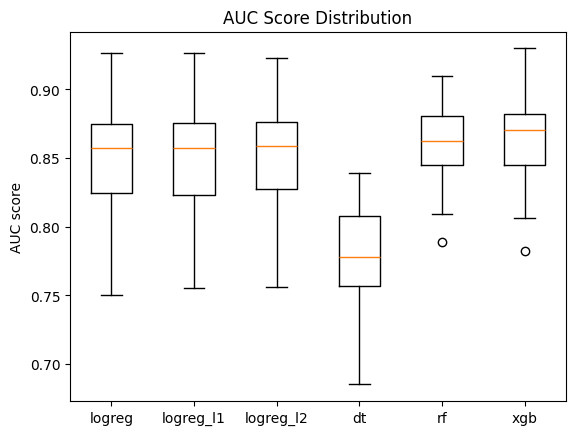

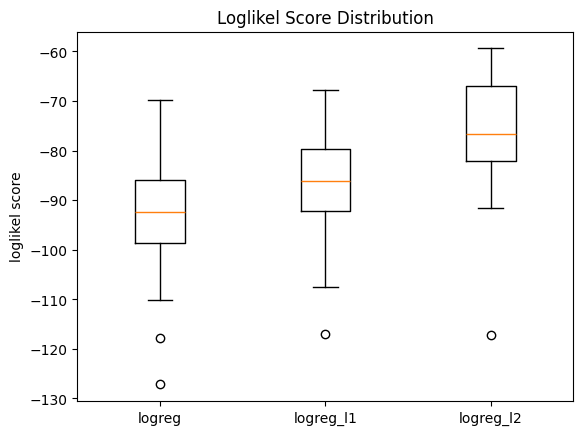

In [244]:
# plot the results
plt.figure()
plt.boxplot([acc_scores['logreg'], acc_scores['logreg_l1'], acc_scores['logreg_l2'],
             acc_scores['dt'], acc_scores['rf'], acc_scores['xgb']], 
            tick_labels=['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', 'xgb'])
plt.ylabel('Accuracy score')
plt.title("Accuracy Score Distribution")

plt.figure()
plt.boxplot([auc_scores['logreg'], auc_scores['logreg_l1'], auc_scores['logreg_l2'],
             auc_scores['dt'], auc_scores['rf'], auc_scores['xgb']], 
            tick_labels=['logreg', 'logreg_l1', 'logreg_l2', 'dt', 'rf', 'xgb'])
plt.ylabel('AUC score')
plt.title("AUC Score Distribution")

plt.figure()
plt.boxplot([ll_scores['logreg'], ll_scores['logreg_l1'], ll_scores['logreg_l2']], 
            tick_labels=['logreg', 'logreg_l1', 'logreg_l2'])
plt.ylabel('loglikel score')
plt.title("Loglikel Score Distribution")

plt.show()

In [250]:
# compare populations of scores with a paired t-test
from scipy.stats import ttest_rel

scores = acc_scores

print("\nt-tests for ACC scores:")
print(ttest_rel(scores['logreg'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg'], scores['logreg_l2']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['rf']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['xgb']).pvalue)
print(ttest_rel(scores['rf'], scores['xgb']).pvalue)

scores = auc_scores

print("\nt-tests for AUC scores:")
print(ttest_rel(scores['logreg'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg'], scores['logreg_l2']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['rf']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['xgb']).pvalue)
print(ttest_rel(scores['rf'], scores['xgb']).pvalue)

scores = ll_scores

print("\nt-tests for loglikel scores:")
print(ttest_rel(scores['logreg'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg'], scores['logreg_l2']).pvalue)


t-tests for ACC scores:
0.7156821076942612
0.11045413930370208
0.23445009989042814
0.39794586252651676
0.05145376852702031
0.004940696762562025

t-tests for AUC scores:
0.5630863981262767
0.810799747019759
0.9794402312070816
0.059561292943575296
0.007324652318013474
0.8605967381746688

t-tests for loglikel scores:
8.876776366516089e-05
0.00012982330099373947
4.66350330351257e-07


In [251]:
# it's hard to see the mean loglikelihood scores in the plot so print them out
print({key: np.mean(scores) for key, scores in acc_scores.items()})

{'logreg': np.float64(0.8048507462686567), 'logreg_l1': np.float64(0.8041044776119403), 'logreg_l2': np.float64(0.8085820895522389), 'dt': np.float64(0.7925373134328357), 'rf': np.float64(0.8026119402985076), 'xgb': np.float64(0.821268656716418)}


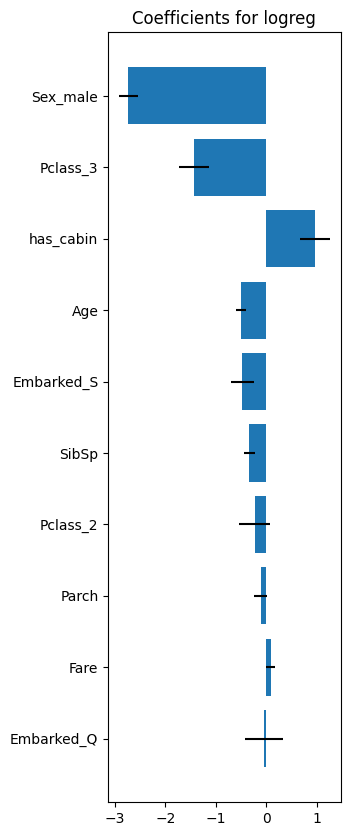

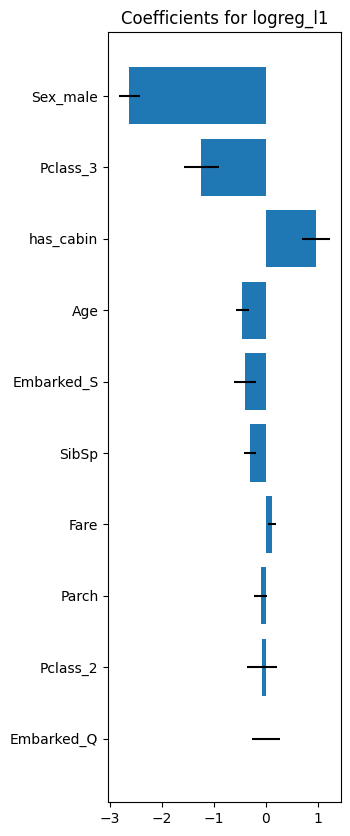

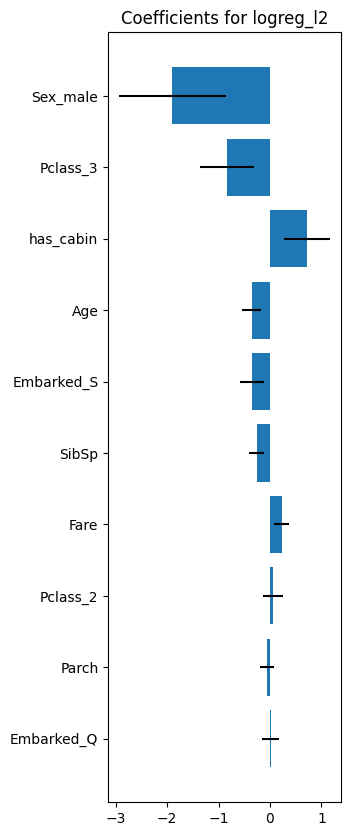

In [252]:
# plot the coefficients with variance over the train/test splits
# there are a lot of variables this time, so rank them according to coefficient magnitude to make it easier to visualize

for model_name in ['logreg', 'logreg_l1', 'logreg_l2']:
    
    coefs_ = pd.DataFrame(coefs[model_name]) # find the coefficients for the model
    coefs_means = coefs_.mean(axis=0).abs().sort_values(ascending=False) # sort the coefficients by absolute mean value
    top_names = coefs_means.index[:50]  # we need the names of the first 50 features
    coefs_ = coefs_[top_names] # only pick the coefs with the top_names above
    coefs_ = coefs_[coefs_.columns[::-1]]
    
    plt.figure(figsize=(3, 10))
    # plot the coefficients with error bars where the highest abosulte mean value is at the top
    plt.barh(y=range(coefs_.shape[1]), width=coefs_.mean(axis=0), xerr=2 * coefs_.std(axis=0), tick_label=coefs_.columns)
    plt.title("Coefficients for %s" % model_name)
    plt.show()

<Axes: >

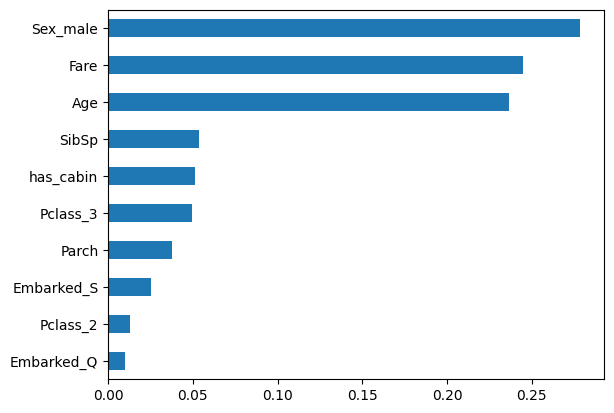

In [253]:
rf_feature_importances = rf.feature_importances_  # the relative feature importances
rf_feature_names = rf.feature_names_in_  # these are the corresponding feature names
rf_s = pd.Series(rf_feature_importances, index=rf_feature_names)  # make a series for convenience
rf_s = rf_s.sort_values()  # sort them for visualization
rf_s.plot(kind='barh')

<BarContainer object of 10 artists>

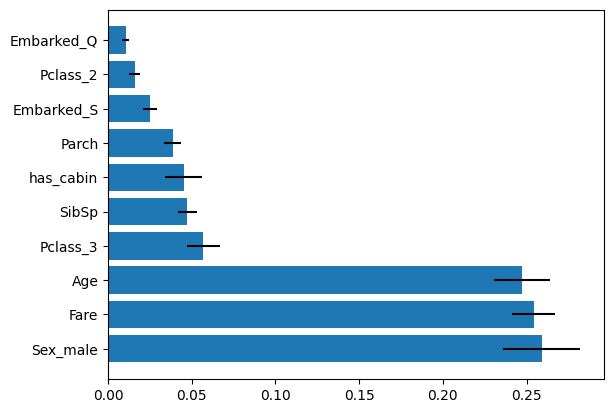

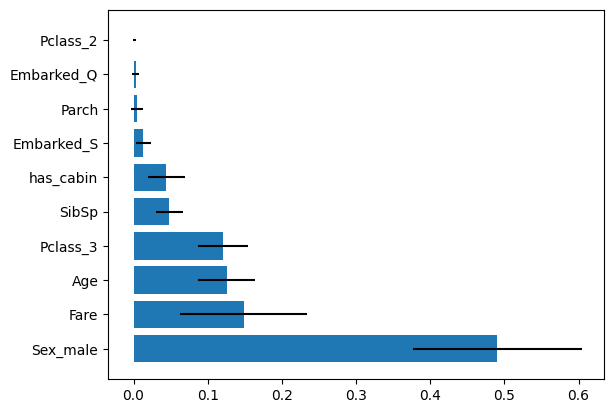

In [254]:
# random forest
plt.figure()
rf_ = pd.DataFrame(importances_rf)
sorted_means = rf_.mean(axis=0).sort_values(ascending=False)
rf_ = rf_[sorted_means.index]
plt.barh(y=range(rf_.shape[1]), width=rf_.mean(axis=0), xerr=2 * rf_.std(axis=0), tick_label=sorted_means.index)

# GBT
plt.figure()
gbt_ = pd.DataFrame(importances_gbt)
sorted_means = gbt_.mean(axis=0).sort_values(ascending=False)
gbt_ = gbt_[sorted_means.index]
plt.barh(y=range(gbt_.shape[1]), width=gbt_.mean(axis=0), xerr=2 * gbt_.std(axis=0), tick_label=sorted_means.index)

# Modifying the Testing Data Set

In [325]:
#import the test data from the csv file

test = pd.read_csv('../data/test.csv')
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [326]:
test = test.set_index("PassengerId")

In [327]:
test = test.drop(labels=["Name", "Ticket"], axis = 1)

In [328]:
# Fill in the missing values under Age column with the mean of the column as integers
test['Age'] = test['Age'].fillna(data['Age'].mean()).astype(float)

In [329]:
# Fill in the missing values under Age column with the mean of the column as integers
test['Fare'] = test['Fare'].fillna(data['Fare'].mean()).astype(float)

In [330]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.500000,0,0,7.8292,NaN,Q
893,3,female,47.000000,1,0,7.0000,NaN,S
894,2,male,62.000000,0,0,9.6875,NaN,Q
895,3,male,27.000000,0,0,8.6625,NaN,S
896,3,female,22.000000,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
1305,3,male,29.498313,0,0,8.0500,NaN,S
1306,1,female,39.000000,0,0,108.9000,C105,C
1307,3,male,38.500000,0,0,7.2500,NaN,S


In [331]:
# drop the cabin and cabin_initial columns
test_has_cabin = np.ones((len(test),1))
test_has_cabin[test["Cabin"].isnull()] = 0

test["has_cabin"] = test_has_cabin

In [332]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,has_cabin
PassengerId,,,,,,,,,
892,3,male,34.500000,0,0,7.8292,NaN,Q,0.0
893,3,female,47.000000,1,0,7.0000,NaN,S,0.0
894,2,male,62.000000,0,0,9.6875,NaN,Q,0.0
895,3,male,27.000000,0,0,8.6625,NaN,S,0.0
896,3,female,22.000000,1,1,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...
1305,3,male,29.498313,0,0,8.0500,NaN,S,0.0
1306,1,female,39.000000,0,0,108.9000,C105,C,1.0
1307,3,male,38.500000,0,0,7.2500,NaN,S,0.0


In [333]:
test_cat = test[["Sex", "Pclass", "Embarked"]].copy()

# cat_encoder = OneHotEncoder(drop="first", sparse_output=False)
test_cat_hot = cat_encoder.transform(test_cat)

In [334]:
test_cat_hot_df = pd.DataFrame(test_cat_hot,
                               columns=cat_encoder.get_feature_names_out(),
                               index=test_cat.index)

In [335]:
test_cat_hot_df.tail()

,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,
1305,1.0,0.0,1.0,0.0,1.0
1306,0.0,0.0,0.0,0.0,0.0
1307,1.0,0.0,1.0,0.0,1.0
1308,1.0,0.0,1.0,0.0,1.0
1309,1.0,0.0,1.0,0.0,0.0


In [336]:
test = pd.concat([test,test_cat_hot_df], axis=1)

In [337]:
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,has_cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1305,3,male,29.498313,0,0,8.0500,NaN,S,0.0,1.0,0.0,1.0,0.0,1.0
1306,1,female,39.000000,0,0,108.9000,C105,C,1.0,0.0,0.0,0.0,0.0,0.0
1307,3,male,38.500000,0,0,7.2500,NaN,S,0.0,1.0,0.0,1.0,0.0,1.0
1308,3,male,29.498313,0,0,8.0500,NaN,S,0.0,1.0,0.0,1.0,0.0,1.0
1309,3,male,29.498313,1,1,22.3583,NaN,C,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Drop the following encoded columns
# ['Pclass', 'Sex', 'Embarked', 'Cabin']
test_clean = test.drop(labels=['Pclass', 'Sex', 'Embarked', "Cabin"], axis=1)

In [339]:
test_clean

,Age,SibSp,Parch,Fare,has_cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,34.500000,0,0,7.8292,0.0,1.0,0.0,1.0,1.0,0.0
893,47.000000,1,0,7.0000,0.0,0.0,0.0,1.0,0.0,1.0
894,62.000000,0,0,9.6875,0.0,1.0,1.0,0.0,1.0,0.0
895,27.000000,0,0,8.6625,0.0,1.0,0.0,1.0,0.0,1.0
896,22.000000,1,1,12.2875,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1305,29.498313,0,0,8.0500,0.0,1.0,0.0,1.0,0.0,1.0
1306,39.000000,0,0,108.9000,1.0,0.0,0.0,0.0,0.0,0.0
1307,38.500000,0,0,7.2500,0.0,1.0,0.0,1.0,0.0,1.0


# FINAL MODEL TRAINING AND DEFINITION

In [340]:
test_clean[["Age", "SibSp", "Parch", "Fare"]] = test_clean[["Age", "SibSp", "Parch", "Fare"]].astype(float)

In [341]:
X_train = X_train_clean.copy()  # remember .iloc is used for integer indexing!
X_test = test_clean.copy()

Y_train = y_train

# standardize the predictors, for the columns that are needed to normalized before
# not here the indexing of column is done with key
for key in columns_to_normalize:
    x_mean = X_train[key].mean()
    x_std = X_train[key].std()
    X_train.loc[:, key] = (X_train[key].astype(float) - x_mean) / x_std  # vectorized
    X_test.loc[:, key] = (X_test[key].astype(float) - x_mean) / x_std  # use the training statistics to transform the test cases


final_model = GradientBoostingClassifier(n_estimators=grid.best_estimator_.n_estimators_,
                                         learning_rate=grid.best_estimator_.learning_rate
                                         )
final_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200)

In [342]:
X_test.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
has_cabin     0
Sex_male      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [343]:
y_pred = final_model.predict(X_test)

In [353]:
y_pred_df = pd.DataFrame(y_pred,
                         columns=["Survived"],
                         index=X_test.index)

In [352]:
y_pred_df.to_csv("../data/gendersubmission.csv")

---

# FOR NOW, IGNORE PARTS BELOW

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
scaler.fit(X_train[["Age", "SibSp", "Parch", "Fare"]])
X_train_scaled = scaler.transform(X_train[["Age", "SibSp", "Parch", "Fare"]])

In [219]:
X_train_scaled

array([[-0.57802333,  0.43135024, -0.47432585, -0.50023975],
       [ 0.65537059,  0.43135024, -0.47432585,  0.78894661],
       [-0.26967485, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [-0.03841349,  0.43135024,  2.00611934, -0.17408416],
       [-0.26967485, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.19284787, -0.47519908, -0.47432585, -0.49017322]],
      shape=(889, 4))

#### The above is what we want, let's try to replicate this preprocessing pipeline so we can use this later for our test data set

In [103]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,3.0,male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,female,35.0,1.0,0.0,113803,53.1000,S,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,male,35.0,0.0,0.0,373450,8.0500,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age",
               "total_rooms", "total_bedrooms", "population",
               "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy ="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out = ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity (n_clusters = 10, gamma = 1., random_state = 42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households","median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))],
    remainder = default_num_pipeline # one column remaining : housing_median_age
)